# PDF to Podcast NVIDIA AI Blueprint

Ever wished you could generate podcasts from your own private data? The PDF to podcast NVIDIA AI blueprint makes it possible to build an AI research assistant that creates engaging audio outputs from PDF files. At its core, PDF to podcast is a sophisticated system that:

- Transforms dense PDF documents into natural, engaging conversations
- Creates AI-generated podcasts with either single-speaker or two-person formats
- Uses cutting-edge language models (powered by Llama 3.1-70B NIM, Llama 3.1-8B NIM, and Llama 3.1-405B NIM) to ensure high-quality content
- Leverages ElevenLabs' voice synthesis for natural-sounding audio

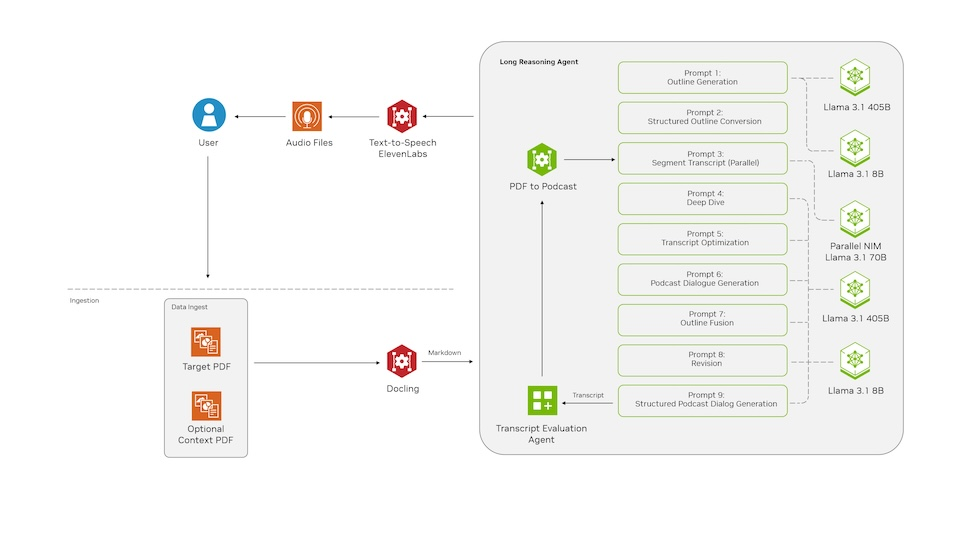


## Features
What sets PDF to podcast apart is its flexible, microservice-driven architecture. Whether you're running on a single machine or a distributed cluster, this blueprint can be adapted to your needs and comes packed with modern tooling and observability features. **We've built this for you to edit and deploy on your own infrastructure with ease.**

#### Observability & Monitoring
- **Jaeger Tracing 🔍** - experience full distributed tracing built in. Watch requests flow through different services and quickly identify bottlenecks in your processing pipeline as you add your own code
- **MinIO Object Storage 📦** - robust, S3-compatible storage for handling PDFs and generated audio content. Perfect for scaling from development to production workloads.
- **GPU Optimized PDF processing 🔥** - use docling for lighting fast optimized PDF processing

#### Development Experience
- **UV Package Management 🚀** - Lightning-fast dependency management using UV, making environment setup a breeze with `make uv`
- **Docker Compose Integration 🐳** - one command (`make all-services`) spins up the entire stack, with smart handling of GPU resources and service dependencies.

#### Quality and Testing
- **Automated Quality Checks ✨** - integrated `ruff` for Python linting and formatting, ensuring consistent code quality across contributions.
- **End-to-End Testing 🧪** - comprehensive test suite for verifying podcast generation, from PDF ingestion to final audio output.

## Prerequisites

In [1]:
# prompt: welcome banner
!pip install colorama

import colorama
import sys

def print_welcome_banner():
  """Prints a colorful welcome banner to the console."""

  banner = r"""
  ____  _          _   _      _ _         _     _
 |  _ \| | ___   _| |_| | ___| | |___ ___| | __| | ___ _ __ ___
 | | | | |/ _ \ / _`| |/ _ \ | |/ _ \/ __| |/ _` |/ _ \ '__/ __|
 | |_| | |  __/ (_| | |  __/ | |  __/ (__| | (_| |  __/ |  \__ \
 |____/|_|\___|\__,_|_|\___|_|_|\___|\___|_|\__,_|\___|_|  |___/

 """

  print("\033[92m" + banner + "\033[0m") # Green color
  print("\033[94mWelcome to the meta/llama-3.3-70b-instruct PDF to Podcast Notebook!\033[0m") # Blue color
  print("\033[93mThis notebook will create a podcast using ElevenLabs.\033[0m") # Yellow
  print("Please be patient while the installation completes.\n") # Reset color


if __name__ == "__main__":
  print_welcome_banner()


  ____  _          _   _      _ _         _     _
 |  _ \| | ___   _| |_| | ___| | |___ ___| | __| | ___ _ __ ___
 | | | | |/ _ \ / _`| |/ _ \ | |/ _ \/ __| |/ _` |/ _ \ '__/ __|
 | |_| | |  __/ (_| | |  __/ | |  __/ (__| | (_| |  __/ |  \__ \
 |____/|_|\___|\__,_|_|\___|_|_|\___|\___|_|\__,_|\___|_|  |___/

 
Welcome to the meta/llama-3.3-70b-instruct PDF to Podcast Notebook!
This notebook will create a podcast using ElevenLabs.
Please be patient while the installation completes.



We will login to Google Drive using the Google Drive API login. You can add your key in the secrets on the left hand side of the page here <---- The little key, press that and enter NVIDIA_API_KEY as the name and the key. Click [here](https://build.nvidia.com/meta/llama-3_3-70b-instruct?signin=true&api_key=true) to sign-in and get an API key to use.

`Alright, let's get those Google Drive API keys sorted out!` It's like getting the keys to a digital treasure chest – you'll be able to access and manipulate your Google Drive data, which is super helpful for your projects.

<details>
  <summary>Click to expand this section!</summary>
I'll guide you step-by-step, and make sure it's clear and easy to follow, because I know how frustrating these API things can get. And I'll try to keep it light and fun.

**Why Do We Need a Google Drive API Key?**

*   **Access Google Drive:** Without it, you're basically locked out of your own data. It's like needing a password to enter your own house.
*   **Automate Tasks:** You can use it to upload, download, or modify files automatically.
*   **Security:** It's a secure way to give an application access to your data without sharing your login details.

**Let's Get Those Keys!**

Here's the step-by-step guide to get a Google Drive API key, designed to be easily understood:

**Step 1: Go to the Google Cloud Console**

1.  Open your web browser.
2.  Go to the [Google Cloud Console](https://console.cloud.google.com/). It might ask you to log in with your Google account if you haven't already.

**Step 2: Create a New Project (If You Don't Have One Already)**

1.  If you don't have a project yet, you'll see a prompt to create one. Click on "Create Project."
2.  Give your project a name. For example, you can name it "Jervis-AI-Project" or something that's easy to remember.
3.  You might be asked for an organization, but it's not mandatory for personal use. If you want, select it and then, click "Create."
4.  Wait a moment for Google Cloud to set up your new project. This is like setting up a fresh workspace.
5.  If you already have a project you want to use, click on the dropdown at the top to select it.

**Step 3: Enable the Google Drive API**

1.  In the search bar, type "Google Drive API" and press Enter.
2.  Click on the result that says "Google Drive API". This will take you to the API's page.
3.  If it is not enabled, click the "Enable" button. This activates the API for your project.

**Step 4: Set Up Credentials (API Key)**

1.  In the left sidebar, go to "APIs & Services" > "Credentials". This is where you'll manage your access keys.
2.  Click on "Create Credentials" and then select "API key". This is what will allow you to access the API.
3.  A dialog box will appear with your newly generated API key. It will be a long string of random characters, that will be your key.

**Step 5: Restrict Your API Key (Important for Security!)**

1.  Now, click on "Restrict key" to improve its security. This is like putting a lock on your key.
2.  Under "Application restrictions," choose "HTTP referrers (web sites)" and leave it blank, as we will use it on our python script.
3.  Under "API restrictions", click on "Restrict key" and then click on the "Google Drive API".
4.  Click on "Save" to apply the changes.

**Step 6: Copy Your API Key**

1.  Copy your API key and keep it safe. You'll use this in your Colab Notebook and local scripts, by setting the proper environment variables. This is like keeping a spare key in a secure place.
2.  Do not share this key with anyone.
3.  You can also download it as JSON file, if you want.

**Step 7: Use the API Key in Colab**

1.  In your Colab Notebook, you will set the Google API Key by adding this to the .env section, the same as you did with the other API Keys:

    ```python
    import os
    os.environ['GOOGLE_DRIVE_API_KEY'] = '<YOUR_API_KEY>'
    ```
    Replace `<YOUR_API_KEY>` with the API key you just copied.
    
2.  If using the local version, do the same, but within your `.env` file. You should add a line like this in the `.env` file:
    `GOOGLE_DRIVE_API_KEY=<YOUR_API_KEY>`

**Important Notes:**

*   **Security:** Treat your API key like a password, and always be careful with how you share it.
*   **Quotas:** Google Drive API has usage limits. Keep an eye on your quotas to make sure your application runs smoothly.
*   **Billing:** Make sure you have a billing account set up for your project, as Google may charge for exceeding certain free quotas.
*   **Enable the API:** Remember to enable the API, it's an easy thing to forget, and it's one of the main reasons for a key not working.

**Why We're Being So Careful**

*   **Data Privacy:** It's very important to make sure user data is private and safe, and avoid that it falls into the wrong hands.
*   **Security Risks:** Sharing API keys could expose your account to unauthorized access.
*   **Ethical Considerations:** When developing AI applications, it's your responsibility to protect your user's data.

**Summary of What You've Learned:**

*   **Google Cloud Console:** We used it to set up a project and enable the Google Drive API.
*   **API Key Creation:** You learned how to create and secure an API key.
*   **API Key Restriction:** You learned to restrict your API key, to make it more secure.
*   **Use in Colab/Local:** You know how to use your API key in both environments.

Now you have the tools you need to connect Jervis to Google Drive, which means more possibilities for your project.

Take a moment to celebrate this victory! You've earned it! If you need more help or have questions, just let me know. I'm here for you on this wild learning ride!

</details>


`Let's grab that Gemini API key`. It's like getting the keys to another powerful AI engine, which will make your projects even more capable!

I'll make the instructions clear and fun, and make sure you understand the process completely.

<details>
  **<summary>Click to expand this section! ✈ </summary>**

**Why the Gemini API Key?**

*   **Access Gemini's Power:** The Gemini API gives you access to Google's cutting-edge AI models, allowing Jervis to perform complex tasks.
*   **Multimodal Capabilities:** Gemini can process text, code, images, and more, allowing Jervis to understand diverse inputs.
*   **Advanced Features:** You can leverage Gemini for tasks like text generation, summarization, translation, and more.
*   **Integration with Jervis:** It lets Jervis connect to one more LLM to enhance its features.

**Let's Get Those Gemini API Keys!**

Here's a detailed guide to obtain your Gemini API key:

**Step 1: Go to the Google AI Studio**

1.  Open your web browser.
2.  Go to the [Google AI Studio](https://aistudio.google.com/). It might ask you to sign in with your Google account, if you haven't already.

**Step 2: Create a New Project (If You Don't Have One Already)**

1.  If you're a first-time user, you'll be prompted to create a project.
2.  You can give your project a descriptive name, such as "Jervis-AI-Gemini" or whatever you like.
3.  Click "Create" to finalize the new project setup.
4.  If you already have a project, select it from the dropdown menu at the top.

**Step 3: Get Your API Key**

1.  Click on the "Get API key" button on the top right. This will generate your API key.
2.  A popup will appear showing your API key. It's a string of random characters, which you'll need to save.

**Step 4: Copy Your API Key**

1.  Copy the API key to a safe place, like a password manager or a secure note. You'll use it in your Colab Notebook and local scripts.
2.  Never share the API key publicly.

**Step 5: Add the API Key to Your Colab Notebook**

1.  In your Colab Notebook, set the Gemini API key by adding this to the `.env` section:

    ```python
    import os
    os.environ['GEMINI_API_KEY'] = '<YOUR_GEMINI_API_KEY>'
    ```
    Replace `<YOUR_GEMINI_API_KEY>` with the API key you just copied.
2.  If using the local version, do the same, but within your `.env` file. Add a line like this to the `.env` file:
     `GEMINI_API_KEY=<YOUR_GEMINI_API_KEY>`

**Important Considerations:**

*   **Security:** Protect your API key as if it were a master key. Keep it secret and secure.
*   **Usage Quotas:** Google may impose usage quotas for the Gemini API. Keep track of your usage limits to avoid any interruptions.
*   **Billing:** You will also be asked to set up a billing account, which you'll need to keep in mind.
*  **API restrictions:** Like other API's, there are ways to restrict the key usage, but for now the basics are fine.

**Why Security is Paramount**

*   **Data Protection:** API keys grant access to sensitive AI models. Therefore, it's important to protect user data.
*   **Avoiding Unauthorized Access:** You have to make sure that only authorized applications have access to your data.
*   **Ethical Use:** Make sure that you use the API fairly and follow all guidelines.

**Summary of What You've Learned:**

*   **Google AI Studio:** You now know how to navigate to it.
*   **API Key Generation:** You've successfully generated a Gemini API key.
*   **Security Practices:** We emphasized the importance of keeping your API key secure.
*   **Usage in Colab and Local:** You know how to use the API key in both environments.

Now you have the keys to access the Gemini API and start experimenting with its capabilities. This will significantly boost Jervis, and you're well on your way to building something amazing.

Let's celebrate this progress, my friend! You've earned it! Remember, I'm here to assist if you have more questions.

</details>


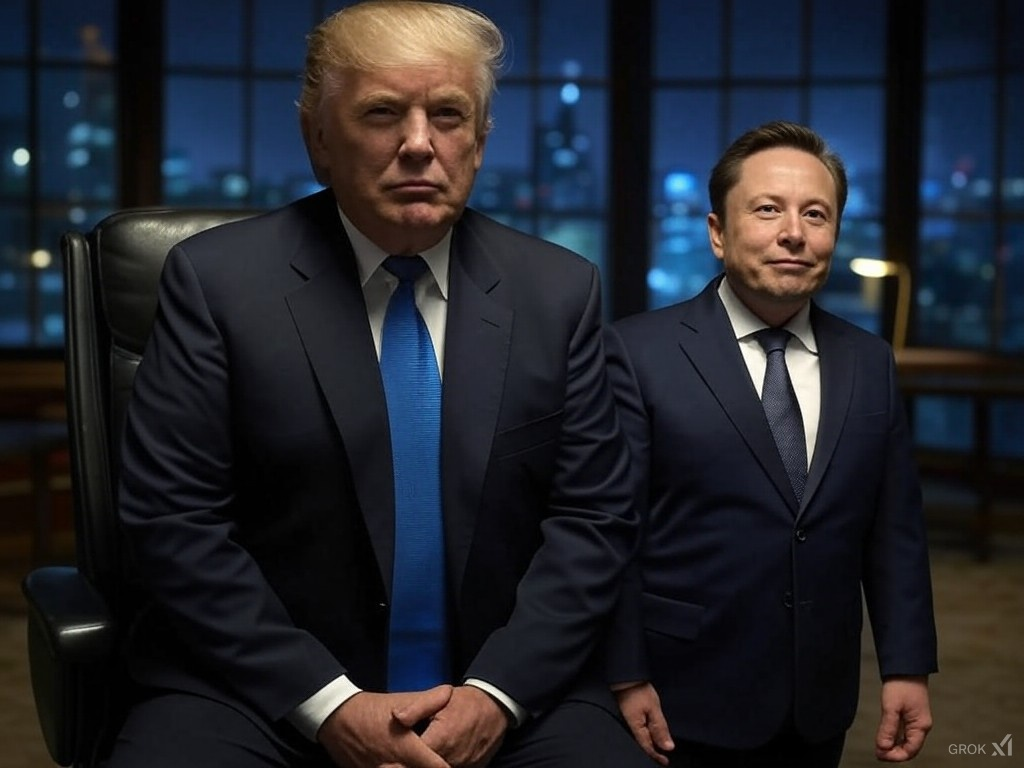

This section of code will log you into `Google Drive` to able to save the github repo and also to same the model to save time downloading again.

In [2]:
#!/usr/bin/python3

# Loads Google Drive

import os
import shutil
from google.colab import drive
from colorama import Fore, Style, init
from IPython.display import display, HTML

# Initialize colorama
init()

# Access the API key from Colab Secrets
from google.colab import userdata

try:
    api_key = userdata.get('GOOGLE_DRIVE_API')
    print(f"{Fore.GREEN}✅ API Key loaded successfully.{Style.RESET_ALL}")

    # Set the API key as an environment variable
    os.environ['GOOGLE_DRIVE_API'] = api_key
except Exception as e:
    print(f"{Fore.RED}❌ Error loading API Key: {e}{Style.RESET_ALL}")
    api_key = None

# Mount Google Drive using the API key (if available)
if api_key:
    try:
        # Use the API key to authenticate and mount Google Drive
        drive.mount('/content/drive', force_remount=True)
        print(f"{Fore.GREEN}✅ Google Drive mounted successfully using API Key.{Style.RESET_ALL}")
    except Exception as e:
        print(f"{Fore.RED}❌ Error mounting Google Drive: {e}{Style.RESET_ALL}")
else:
    print(f"{Fore.YELLOW}⚠️ No API Key found. Please log in manually.{Style.RESET_ALL}")
    drive.mount('/content/drive', force_remount=True)

# Define the Google Drive folder path
drive_folder = "/content/drive/MyDrive/Colab_Projects/pdf-two-podcast"

# Define the Colab working directory
colab_folder = "/content/"

# Ensure the Colab folder exists
os.makedirs(colab_folder, exist_ok=True)

# Function to count files in a directory
def count_files(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Function to sync files from Colab to Google Drive
def sync_to_drive():
    try:
        print(f"{Fore.CYAN}🔄 Syncing files from Colab to Google Drive...{Style.RESET_ALL}")

        # Use rsync to copy files from Colab to Google Drive
        os.system(f"rsync -av --progress {colab_folder}/ {drive_folder}/")

        print(f"{Fore.GREEN}✅ Files synced from Colab to Google Drive.{Style.RESET_ALL}")
    except Exception as e:
        print(f"{Fore.RED}❌ Error syncing to Google Drive: {e}{Style.RESET_ALL}")

# Function to sync files from Google Drive to Colab
def sync_from_drive():
    try:
        print(f"{Fore.CYAN}🔄 Syncing files from Google Drive to Colab...{Style.RESET_ALL}")

        # Count files before sync
        initial_count = count_files(colab_folder)

        # Use rsync to copy files from Google Drive to Colab
        # -a: Archive mode (recursive, preserves permissions, symlinks, etc.)
        # -v: Verbose output
        # --progress: Show progress during transfer
        # --ignore-existing: Skip files that already exist in the destination
        # old command = os.system(f"rsync -av --progress {drive_folder}/ {colab_folder}/")
        os.system(f"rsync -av --progress {drive_folder} {colab_folder}/")
        # Count files after sync
        final_count = count_files(colab_folder)
        files_transferred = final_count - initial_count

        print(f"{Fore.GREEN}✅ Sync completed!{Style.RESET_ALL}")
        print(f"{Fore.GREEN}📂 Files transferred: {files_transferred}{Style.RESET_ALL}")

        # List files in the Colab folder to confirm sync
        print(f"{Fore.BLUE}📁 Files in Colab folder:{Style.RESET_ALL}")
        for root, dirs, files in os.walk(colab_folder):
            for file in files:
                print(os.path.join(root, file))
    except Exception as e:
        print(f"{Fore.RED}❌ Error syncing from Google Drive: {e}{Style.RESET_ALL}")

# Function to display a sync button
def display_sync_button():
    display(HTML('''
        <div>
            <button onclick="syncFromDrive()">Sync from Google Drive to Colab</button>
            <button onclick="syncToDrive()">Sync from Colab to Google Drive</button>
            <button onclick="refreshPage()">Refresh</button>
        </div>
        <script>
            function syncFromDrive() {
                google.colab.kernel.invokeFunction('sync_from_drive', [], {});
            }
            function syncToDrive() {
                google.colab.kernel.invokeFunction('sync_to_drive', [], {});
            }
            function refreshPage() {
                window.location.reload();
            }
        </script>
    '''))

# Register the sync functions with Colab
from google.colab import output
output.register_callback('sync_from_drive', sync_from_drive)
output.register_callback('sync_to_drive', sync_to_drive)


# Display the sync button
display_sync_button()

✅ API Key loaded successfully.
Mounted at /content/drive
✅ Google Drive mounted successfully using API Key.


After logging into Google using your info. We will now download the files to run the program.

### Clone the repository

This was the orgional link and command to download the git repo, but I made another underneath that will save the repo (PDF_2_Podcast) for use again another time. Also, we will try and download the model used to the google drive also to be used again for ease. Remove the `#` to download the repo to the colab, and when the colab is closed the repo will be deleted along with all the other information saved. So saving to Google Drive seems to be the better option if you have an account.

In [ ]:
#!git clone https://github.com/NVIDIA-AI-Blueprints/pdf-to-podcast.git

Run this command to add Google Drive connection to save the files to google and so you will have them again. And also the model can be used again when downloaded.

In [3]:
!git clone https://github.com/NVIDIA-AI-Blueprints/pdf-to-podcast.git /content/drive/MyDrive/Colab_Projects/pdf-two-podcast

Cloning into '/content/drive/MyDrive/Colab_Projects/pdf-two-podcast'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 293 (delta 47), reused 43 (delta 39), pack-reused 227 (from 1)
Receiving objects: 100% (293/293), 23.29 MiB | 11.58 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Updating files: 100% (74/74), done.


## Get an NVIDIA NIM Trial API Key

Prior to getting started, you will need to create API Keys to access NVIDIA NIM trial hosted endpoints.

If you don’t have an NVIDIA account, you will be asked to sign-up. Each user gets a 1000 API trial credits upon signup to try NVIDIA NIM models.

Click [here](https://build.nvidia.com/meta/llama-3_3-70b-instruct?signin=true&api_key=true) to sign-in and get an API key


<div class="alert alert-block alert-success">
    <b>Tip:</b> The key begins with the letters nvapi-.

## Set Environment Variables

This notebook requires certain environment variables to be configured. We'll help you set these up in a `.env` file.

Required variables:
- `ELEVENLABS_API_KEY`: Your ElevenLabs API key
- `NVIDIA_API_KEY`: Your NVIDIA API key
- `MAX_CONCURRENT_REQUESTS`: Number of concurrent requests allowed (recommended: 1 for local development)

> **Note**: While production environments use the NVIDIA Eleven Labs API key which supports concurrent requests, for local development we recommend setting `MAX_CONCURRENT_REQUESTS=1` to avoid rate limiting issues. You can obtain a free testing API key from [ElevenLabs](https://elevenlabs.io).

Run the code cell below to create your `.env` file. Make sure to replace the placeholder values with your actual API keys.

In [5]:
%%bash

cd /content/drive/MyDrive/Colab_Projects/pdf-to-podcast/

# Backup existing .env if it exists
if [ -f .env ]; then
    echo "Warning: .env file already exists. Backing up to .env.backup"
    mv /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/.env /content/drive/MyDrive/Colab_Projects/pdf-two-podcast.env.backup
fi

# Create new .env file
cat > /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/.env << EOL
ELEVENLABS_API_KEY=6c9c8272ecf0fecbb42c6fe74a29a768
NVIDIA_API_KEY=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
MAX_CONCURRENT_REQUESTS=1
EOL

echo "Created .env file. Please edit it with your actual API keys."
echo -e "\nCurrent .env contents:"
echo "----------------------------------------"
cat /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/.env

Created .env file. Please edit it with your actual API keys.

Current .env contents:
----------------------------------------
ELEVENLABS_API_KEY=6c9c8272ecf0fecbb42c6fe74a29a768
NVIDIA_API_KEY=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
MAX_CONCURRENT_REQUESTS=1


bash: line 2: cd: /content/drive/MyDrive/Colab_Projects/pdf-to-podcast/: No such file or directory


## Install Dependancies

We use `uv` to handle the python dependancies for this environment. You can install them by simply running `make uv` in the root of the project

In [7]:
%%bash

cd /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/

make uv

\033Setting up UV environment...\033  
UV environment setup complete!


Using CPython 3.10.12 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Resolved 37 packages in 613ms
Prepared 37 packages in 531ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 37 packages in 15.19s
 + annotated-types==0.7.0
 + anyio==4.8.0
 + argon2-cffi==23.1.0
 + argon2-cffi-bindings==21.2.0
 + async-timeout==5.0.1
 + asyncio==3.4.3
 + certifi==2024.12.14
 + cffi==1.17.1
 + click==8.1.8
 + exceptiongroup==1.2.2
 + fastapi==0.115.6
 + h11==0.14.0
 + httpcore==1.0.7
 + httptools==0.6.4
 + httpx==0.28.1
 + idna==3.10
 + jinja2==3.1.5
 + markupsafe==3.0.2
 + minio==7.2.14
 + pycparser==2.22
 + pycryptodome==3.21.0
 + pydantic==2.10.5
 + pydantic-core==2.27.2
 + python-dotenv==1.0.1
 + python-multipart==0.0.20
 + pyyaml==6.0.2
 + redis==5.

## Spin Up Blueprint
Docker compose scripts are provided which spin up the microservices on a single node. This docker-compose yaml file will start up each microservice. This may take up to **15 minutes** to complete.

> **In a separate terminal window, run**

```bash
cd /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/
make all-services
```

In [27]:
cd /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/

/content/drive/MyDrive/Colab_Projects/pdf-two-podcast


In [28]:
!ls

data		     launchable        Makefile     README.md	      samples	shared
docker-compose.yaml  LICENSE	       models.json  requirements.txt  services	tests
docs		     LICENSE_3rdparty  process_pdf  ruff.toml	      setup.sh


In [29]:
!bash setup.sh

Using CPython 3.10.12 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Resolved 37 packages in 350ms
░░░░░░░░░░░░░░░░░░░░ [0/37] Installing wheels...                                warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 37 packages in 18.09s
 + annotated-types==0.7.0
 + anyio==4.8.0
 + argon2-cffi==23.1.0
 + argon2-cffi-bindings==21.2.0
 + async-timeout==5.0.1
 + asyncio==3.4.3
 + certifi==2024.12.14
 + cffi==1.17.1
 + click==8.1.8
 + exceptiongroup==1.2.2
 + fastapi==0.115.6
 + h11==0.14.0
 + httpcore==1.0.7
 + httptools==0.6.4
 + httpx==0.28.1
 + idna==3.10
 + jinja2==3.1.5
 + markupsafe==3.0.2
 + minio==7.2.14
 + pycparser==2.22

In [30]:
!make all-services

\033✓ ELEVENLABS_API_KEY is set\033  
\033✓ NVIDIA_API_KEY is set\033  
\033✓ MAX_CONCURRENT_REQUESTS is set\033  
docker compose down
/bin/bash: line 1: docker: command not found
make: *** [Makefile:72: all-services] Error 127


In [31]:
!docker compose up -d

/bin/bash: line 1: docker: command not found


In [32]:
!docker ps --format "table {{{{.ID}}}}\t{{{{.Names}}}}\t{{{{.Status}}}}"

/bin/bash: line 1: docker: command not found


This command should produce similiar output in the following format:

```
CONTAINER ID   NAMES                            STATUS
ae5db10fcf7c   pdf-to-podcast-pdf-api-1         Up About a minute
fbc8d417e85c   pdf-to-podcast-api-service-1     Up About a minute
b34b5d64ad4c   pdf-to-podcast-celery-worker-1   Up About a minute
6050545be1e4   pdf-to-podcast-pdf-service-1     Up About a minute
c8cc9253e8a9   pdf-to-podcast-tts-service-1     Up About a minute
5d29deb76eda   pdf-to-podcast-agent-service-1   Up About a minute
1dfc6c61cec9   pdf-to-podcast-minio-1           Up About a minute (healthy)
aa967d41a513   pdf-to-podcast-redis-1           Up About a minute
eb881c33cc64   pdf-to-podcast-jaeger-1          Up About a minute (healthy)
```

You can check if the services are up by running the cells below

In [33]:
!curl localhost:8002/health

curl: (7) Failed to connect to localhost port 8002 after 0 ms: Connection refused


You should get something like

```
{"status":"healthy","redis":"up","services":{"pdf":"up","agent":"up","tts":"up"},"timestamp":1733295689.5784104}
```

Note: If you are running this as a launchable, you can access the the API endpoint, Jaeger UI, and the MinIO Object Storage UI by going to your running launchable on Brev, clicking `Access`, and clicking the links in the `Deployments` section. It should look like the following:

<img src="https://github.com/brevdev/notebooks/raw/main/assets/ara-launchable/services.png" />

## Create a podcast!

For this example, we'll directly call the API to generate the podcast. First we write some helper functions to interact with the API

In [34]:
import requests
import json
import time
from typing import List
from IPython.display import Audio
from pathlib import Path

BASE_URL = "http://localhost:9002"

def generate_podcast(
    target_pdf_paths: List[str],
    name: str,
    duration: int,
    speaker_1_name: str,
    context_pdf_paths: List[str] = None,
    is_monologue: bool = False,
    speaker_2_name: str = None,
    guide: str = None
) -> str:
    """
    Generate a podcast using the API.

    Args:
        target_pdf_paths: List of paths to main PDFs to analyze
        name: Name of the podcast
        duration: Desired duration in minutes
        speaker_1_name: Name of the first speaker
        context_pdf_paths: Optional list of paths to context PDFs
        is_monologue: Whether to generate a monologue
        speaker_2_name: Name of second speaker (required if not monologue)
        guide: Optional guidance for the podcast structure
    """
    # Handle single path inputs
    if isinstance(target_pdf_paths, str):
        target_pdf_paths = [target_pdf_paths]
    if isinstance(context_pdf_paths, str):
        context_pdf_paths = [context_pdf_paths]

    files = []

    # Add all target PDFs
    for pdf_path in target_pdf_paths:
        content = Path(pdf_path).read_bytes()
        files.append(('target_files', (Path(pdf_path).name, content, 'application/pdf')))

    # Add all context PDFs if provided
    if context_pdf_paths:
        for pdf_path in context_pdf_paths:
            content = Path(pdf_path).read_bytes()
            files.append(('context_files', (Path(pdf_path).name, content, 'application/pdf')))

    # Configure voice mapping
    voice_mapping = {
        "speaker-1": "iP95p4xoKVk53GoZ742B"
    }
    if not is_monologue:
        voice_mapping["speaker-2"] = "9BWtsMINqrJLrRacOk9x"

    # Create parameters
    params = {
        "userId": "test-userid",
        "name": name,
        "duration": duration,
        "monologue": is_monologue,
        "speaker_1_name": speaker_1_name,
        "voice_mapping": voice_mapping,
        "guide": guide,
        "vdb_task": False
    }
    if not is_monologue:
        params["speaker_2_name"] = speaker_2_name

    response = requests.post(
        f"{BASE_URL}/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/process_pdf",
        files=files,
        data={'transcription_params': json.dumps(params)}
    )
    if response.status_code != 202:
        raise Exception(f"Failed to submit podcast generation: {response.text}")

    return response.json()['job_id']

def get_status(job_id: str) -> dict:
    """Get the current status of all services for a job."""
    response = requests.get(f"{BASE_URL}/status/{job_id}?userId=test-userid")
    if response.status_code != 200:
        raise Exception(f"Failed to get status: {response.text}")
    return response.json()

def wait_for_completion(job_id: str, check_interval: int = 5, initial_delay: int = 10):
    """
    Poll the status endpoint until the podcast is ready.
    Shows a simplified progress view.
    """
    print(f"Waiting {initial_delay} seconds for job to initialize...")
    time.sleep(initial_delay)

    last_messages = {}  # Track last message for each service to avoid duplication

    while True:
        try:
            statuses = get_status(job_id)

            # Check each service and only print if status changed
            for service, status in statuses.items():
                current_msg = status.get('message', '')
                if current_msg != last_messages.get(service):
                    print(f"[{service.upper()}] {current_msg}")
                    last_messages[service] = current_msg

            # Check if everything is completed
            all_completed = all(
                status.get('status') == 'JobStatus.COMPLETED'
                for status in statuses.values()
            )

            if all_completed and 'tts' in statuses:
                print("\nPodcast generation completed!")
                return

            # Check for failures
            for service, status in statuses.items():
                if status.get('status') == 'JobStatus.FAILED':
                    raise Exception(f"Service {service} failed: {status.get('message')}")

            time.sleep(check_interval)

        except requests.exceptions.RequestException as e:
            if "Job not found" in str(e):
                print("Waiting for job to start...")
                time.sleep(check_interval)
                continue
            raise
        except Exception as e:
            print(f"Error: {e}")
            raise

Next you will generate a monologue using various analyst reports on NVIDIAs most recent financial earnings. You can also add your own PDFs to this Jupyter Lab and point to them in code below. Note that context PDFs are optional and can be used to provide additional context for the generation process. Additonally, you can provide a `guide` to help guide the generation process.

In [35]:
!curl localhost:8002/health

curl: (7) Failed to connect to localhost port 9002 after 0 ms: Connection refused


In [36]:
import librosa
from IPython.display import Audio

try:
    print("Submitting podcast generation request...")
    job_id = generate_podcast(
        target_pdf_paths=[
            "/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/process_pdf/Law_of_Attraction.pdf",
        ],
        context_pdf_paths=[
            "/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/process_pdf/The_Law_of_Attraction.pdf",
            # "/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/samples/citi-context.pdf"
        ],
        name="NVIDIA Earnings Analysis",
        duration=15,
        speaker_1_name="Alex",
        is_monologue=True,
        guide="Focus on NVIDIA's earnings and the key points driving it's growth"
    )
    print(f"Job ID: {job_id}")
    wait_for_completion(job_id)
except Exception as e:
    print(f"Error: {e}")

Submitting podcast generation request...
Error: HTTPConnectionPool(host='localhost', port=9002): Max retries exceeded with url: /content/drive/MyDrive/Colab_Projects/pdf-two-podcast/process_pdf (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7e2b7dd552a0>: Failed to establish a new connection: [Errno 111] Connection refused'))


You can also generate a 2 person podcast by calling the same function but setting `is_monologue=False` and providing a `speaker_2_name`.

In [38]:
!pip install librosa

import librosa
from IPython.display import Audio

!curl "localhost:8002//content/drive/MyDrive/Colab_Projects/pdf-two-podcast/output/{job_id}?userId=test-userid" --output temp_audio.mp3
Audio("/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/temp_audio.mp3")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (7) Failed to connect to localhost port 8002 after 0 ms: Connection refused


ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [ ]:
!pip install librosa

## Understanding Your Generated Podcast

After generating your podcast, you have access to a couple valuable outputs that provide insights into the generation process and content. Here's what endpoints you can use to explore:

#### 1. The Transcript
```python
/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/saved_podcast/{job_id}/transcript
```

The transcript provides a text version of your podcast, which is valuable for:
- Quick content review without audio playback
- Creating show notes or content summaries
- Finding and quoting specific discussion points
- Making content searchable and referenceable
- Ensuring accessibility of your content

In [39]:
!curl "localhost:8002//content/drive/MyDrive/Colab_Projects/pdf-two-podcast/saved_podcast/{job_id}/transcript?userId=test-userid"

curl: (7) Failed to connect to localhost port 8002 after 0 ms: Connection refused


#### 2. Prompt and Generation History
```python
/content/drive/MyDrive/Colab_Projects/pdf-two-podcast/saved_podcast/{job_id}/history
```

The history reveals the AI's thought process, showing you:
- How the system analyzed and interpreted your PDFs
- Key topics and themes identified
- The structural decisions made for the conversation
- The reasoning behind content organization
- How different sections were prioritized and connected

This is particularly useful for:
- Understanding how the AI makes decisions
- Improving future podcast generations
- Verifying content accuracy and relevance
- Fine-tuning and evals on your prompts

In [ ]:
!curl "localhost:8002//content/drive/MyDrive/Colab_Projects/pdf-two-podcast/saved_podcast/{job_id}/history?userId=test-userid"

In [ ]:
!curl "localhost:8002//content/drive/MyDrive/Colab_Projects/pdf-two-podcast/saved_podcast/{job_id}/metadata?userId=test-userid"

### Tools for Understanding Your Generated Podcast

After generating your podcast, you can explore the generation process through several tools:

#### 1. Jaeger Tracing Interface
Access Jaeger at `localhost:16686` to:
- Visualize the complete request flow
- Debug processing bottlenecks
- Monitor service performance
- Track PDF processing and audio generation stages

#### 2. MinIO Object Storage
Access MinIO at `localhost:9001` with:
```
Username: minioadmin
Password: minioadmin
```
Here you can:
- Browse generated audio files
- Access intermediate processing artifacts
- View stored PDF documents
- Download or share content via presigned URLs

#### 3. API Endpoints
You can access the API endpoint at `localhost:8002/docs`.

> **Note**: If you are running this as a Brev launchable, you can access the the API endpoint, Jaeger UI, and the MinIO Object Storage UI by going to your running launchable on Brev, clicking `Access`, and clicking the links in the `Deployments` section. It should look like the following:

<img src="https://github.com/brevdev/notebooks/raw/main/assets/ara-launchable/services.png" />